<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMDB-Movie-Review-Sentiment-Classification" data-toc-modified-id="IMDB-Movie-Review-Sentiment-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMDB Movie Review Sentiment Classification</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Process" data-toc-modified-id="Process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Process</a></span></li><li><span><a href="#Configure-notebook,-import-libraries,-and-import-dataset" data-toc-modified-id="Configure-notebook,-import-libraries,-and-import-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Configure notebook, import libraries, and import dataset</a></span></li><li><span><a href="#Examine-the-data" data-toc-modified-id="Examine-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examine the data</a></span></li><li><span><a href="#Cleaning-and-preprocessing" data-toc-modified-id="Cleaning-and-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cleaning and preprocessing</a></span></li><li><span><a href="#Bag-of-words-feature-creation" data-toc-modified-id="Bag-of-words-feature-creation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bag-of-words feature creation</a></span></li><li><span><a href="#Baseline-Model-development" data-toc-modified-id="Baseline-Model-development-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Baseline Model development</a></span><ul class="toc-item"><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Initial-pass---Non-ensemble-methods" data-toc-modified-id="Initial-pass---Non-ensemble-methods-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Initial pass - Non-ensemble methods</a></span><ul class="toc-item"><li><span><a href="#LR-Tuning" data-toc-modified-id="LR-Tuning-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>LR Tuning</a></span></li><li><span><a href="#LR-Tuning-Comments" data-toc-modified-id="LR-Tuning-Comments-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>LR Tuning Comments</a></span></li></ul></li><li><span><a href="#Initial-pass---Ensemble-methods" data-toc-modified-id="Initial-pass---Ensemble-methods-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Initial pass - Ensemble methods</a></span></li><li><span><a href="#Kaggle-model" data-toc-modified-id="Kaggle-model-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Kaggle model</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

<h1>IMDB Movie Review Sentiment Classification</h1>

<img style="float: left; margin-right: 15px; width: 30%; height: 30%;" src="images/imdb.jpg" />

# Purpose

The overall goal of this set of write-ups is to explore a number of machine learning algorithms utilizing natural language processing (NLP) to classify the sentiment in a set of IMDB movie reviews.

The specific goals of this write-up include:
1. Create a sparser feature set by removing words not directly related to sentiment
2. Run the models from the [last write-up](./Model-06.ipynb) against the new feature set
3. Determine if the new feature set improves our ability to correctly classify movie review sentiment

This series of write-ups is inspired by the Kaggle [
Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition.    

Dataset source:  [IMDB Movie Reviews](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)

# Process

Previously covered [here](./Model-06.ipynb#Process).

# Configure notebook, import libraries, and import dataset

##### Import libraries

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas import set_option

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# http://www.nltk.org/index.html
# pip install nltk
import nltk
from nltk.corpus import stopwords

# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# pip install BeautifulSoup4
from bs4 import BeautifulSoup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Define global variables

In [8]:
seed = 10
np.random.seed(seed)

# Opens a GUI that allows us to download the NLTK data
# nltk.download()

dataPath = os.path.join('.', 'datasets', 'imdb_movie_reviews')
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')

##### Import dataset

In [9]:
df = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)

# Examine the data

Previously covered [here](./Model-06.ipynb#Examine-the-data).

# Cleaning and preprocessing

Process justification and methodology previously covered [here](./Model-06.ipynb#Cleaning-and-preprocessing).

Define a 'cleaning' function, and clean the training set:

In [10]:
# Convert the stop words to a set
stopWords = set(stopwords.words("english"))

# Clean IMDB review text
def cleanReview(review, stopWords):
    # Remove HTML
    clean = BeautifulSoup(review)
    
    # Remove non-alpha chars
    clean = re.sub("[^a-zA-Z]", ' ', clean.get_text())
    
    # Convert to lower case and "tokenize"
    clean = clean.lower().split()
    
    # Remove stop words
    clean = [x for x in clean if not x in stopWords]

    # Prepare final, cleaned review
    clean = " ".join(clean)
    
    # Return results
    return clean
    

In [ ]:
cleanReviews = [cleanReview(x, stopWords) for x in df['review']]
assert(len(df) == (len(cleanReviews)))

# Bag-of-words feature creation

Initial discussion of the `bag-of-words` algorithm was previously covered [here](./Model-06.ipynb#Bag-of-words-feature-creation).

Next, in the [first write-up](http://localhost:8888/notebooks/Machine-Learning/Python/04-Classic-Datasets/Model-06.ipynb) of this series we examined a sample review--index 108--during the analysis, cleaning, and preprocessing.  We'll post it here again for reference:

In [73]:
cleanReviews[108]

'question one sees movie bad necessarily movie bad get made even see awful first place learned experience learned rules horror movies catalogued satirized countless times last ten years mean someone go ahead make movie uses without shred humor irony movie described loosely based video game script problems black character may always die first asian character always know kung fu may proud figured matrix effect budget necessarily mean use ad nausea ron howard brother guarantee choice roles whenever scene edit together use footage video game one notice cousin rap metal band offers write movie theme free politely decline zombie movies people killing zombies zombies killing people preferably gruesome way possible makes scary white people pay get rave deserve die find old book tell everything need know anything else figure two lines someone asks bare breasts horror movie panacea helicopter boom shot licensing deal sega magically transforms movie student film major studio release try name drop

Since the bag-of-words creation is doing a word count analysis I wanted to explore what would happen if we removed the 'noise' from the reviews.  (And by 'noise' I mean words that likely wouldn't help or hinder sentiment.)  From the review text above we have this string sample for instance:

```
whenever scene edit together use footage video game one notice cousin rap metal band offers
```

It is doubtful this series of words will give the model any 'insights' into if this is a positive or negative review.  However, this next string sample does seem like it would give an indication to review sentiment:

```
question one sees movie bad necessarily movie bad get made even see awful
```

In order to explore this idea let's load a sentiment lexicon into the notebook, and then remove any 'noise' words not found in the sentiment lexicon from the review texts.  We'll then run the 'de-noised' review texts through the same models as we did in the [previous write-up](./Model-06.ipynb), and see if we gain any improvements in speed and/or accuracy.

##### Download the sentiment lexicon

The sentiment lexicon we'll utilize can be found here:  https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon

Using a few commands we can download and extract it:

```
wget https://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar
unrar e opinion-lexicon-English.rar
```

##### Applying the sentiment lexicon  - Single observation

Next we'll want to combine all the positive and negative sentiment words into a single list, and then remove any words from the reviews not found in the sentiment lexicon:

In [42]:
# Combine the positive and negative lists of sentiment lexicon words

with open(os.path.join('.', 'datasets', 'positive-words.txt')) as f:
    _positive = f.read().splitlines()
    
with open(os.path.join('.', 'datasets', 'negative-words.txt')) as f:
    _negative = f.read().splitlines()
    
allWords = _positive[35:] + _negative[35:]

assert( len(allWords) == (len(_positive[35:]) + len(_negative[35:])) )

In [44]:
# Preview our sample review before sentiment lexicon parsing
cleanReviews[108]

'question one sees movie bad necessarily movie bad get made even see awful first place learned experience learned rules horror movies catalogued satirized countless times last ten years mean someone go ahead make movie uses without shred humor irony movie described loosely based video game script problems black character may always die first asian character always know kung fu may proud figured matrix effect budget necessarily mean use ad nausea ron howard brother guarantee choice roles whenever scene edit together use footage video game one notice cousin rap metal band offers write movie theme free politely decline zombie movies people killing zombies zombies killing people preferably gruesome way possible makes scary white people pay get rave deserve die find old book tell everything need know anything else figure two lines someone asks bare breasts horror movie panacea helicopter boom shot licensing deal sega magically transforms movie student film major studio release try name drop

In [51]:
# Apply the sentiment lexicon parsing
_tmp = [x for x in cleanReviews[108].split() if x in allWords]

In [53]:
# Example the 'de-noised' list of remaining words
_tmp

['bad',
 'bad',
 'awful',
 'humor',
 'irony',
 'problems',
 'die',
 'proud',
 'guarantee',
 'free',
 'decline',
 'zombie',
 'killing',
 'killing',
 'preferably',
 'gruesome',
 'scary',
 'die',
 'boom',
 'dead',
 'worse',
 'annihilation']

##### Applying the sentiment lexicon  - All observations

Everything looks good so far, so let's 'de-noise' the entire dataset:

In [56]:
sparseCleanReviews = []

for review in cleanReviews:
    _tmp = [x for x in review.split() if x in allWords]
    sparseCleanReviews.append(" ".join(_tmp))

In [75]:
# Sanity check examination

sparseCleanReviews[108]

'bad bad awful humor irony problems die proud guarantee free decline zombie killing killing preferably gruesome scary die boom dead worse annihilation'

##### CountVectorizer application

We'll now simply repeat the CountVectorizer steps as we did in the [first write-up](./Model-06.ipynb) to create the 'bags-of-words' numeric representation of the 'de-noised' reviews suitable for the machine learning model.

In [59]:
# Utilize the defaults for the object instantiation other than max_features
vec = CountVectorizer(max_features = 5000)

# Similar to how almost every other Scikit-Learn objects works we'll call the fit() and transform() methods
features = vec.fit_transform(sparseCleanReviews)

# And finally we'll convert to a np.array
features = features.toarray()

print("Features shape: ", features.shape)

Features shape:  (25000, 5000)


##### Examine vocabulary

We'll examine what the 'de-noising' did to the top ten top and bottom vocabulary listings:

In [60]:
# Take a look at the first 10 words in the vocabulary
vocab = vec.get_feature_names()
print(vocab[:10])

['abnormal', 'abolish', 'abominable', 'abominably', 'abomination', 'abort', 'aborted', 'aborts', 'abound', 'abounds']


In [61]:
_df = pd.DataFrame(data = features, columns = vocab).sum()
_df.sort_values(ascending = False, inplace = True)

In [62]:
print("Top 10:\n")
print(_df.head(10))

Top 10:

like      20274
good      15140
well      10662
bad        9301
great      9058
plot       6585
love       6454
best       6416
better     5737
work       4372
dtype: int64


Original 'Top 10' before 'de-noising':

```
Top 10:

movie     44031
film      40147
one       26788
like      20274
good      15140
time      12724
even      12646
would     12436
story     11983
really    11736
```

In [63]:
print("Bottom 10:\n")
print(_df.tail(10))

Bottom 10:

hothead          1
pillory          1
immorally        1
immodest         1
beckoned         1
beckoning        1
immoderate       1
horrify          1
hotbeds          1
overbearingly    1
dtype: int64


Original 'Bottom 10' before 'de-noising':

```
Bottom 10:

skull       78
sopranos    78
premiere    78
bunny       78
flair       78
fishing     78
awhile      78
stumbled    78
amused      78
cream       78
```

# Baseline Model development

We are finally ready to develop the baseline model on the data we've explored, cleaned, and processed.  Because the IMDB data set doesn't include a validation set we'll create one from a portion of the training data.  The processes is similar to our work in previous write-ups such as the [Iris classifier](.//Model-01.ipynb).

## Helper functions

In [67]:
def makeRange(start, stop, step, multi, dec):
    vals = []
    for i in range(start, stop, step):
        vals.append(np.round(multi * i, decimals = dec))
        
    return vals

In [68]:
def tuneModel(modelName, modelObj, params, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10

    # Use accuracy since this is a classification problem
    score = 'accuracy'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = pd.DataFrame(columns = ['Model', 'Accuracy', 'Best Params'])

    # Create feature union
    features = []
    # The independant variables (i.e. word counts) are already scaled; no need to do it again 
    features.append(('Scaler', StandardScaler()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_grid = params,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed)      
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

## Create validation data set

In [69]:
# Seperate X and Y values
x = features
y = df["sentiment"]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

x.shape =  (25000, 5000)
y.shape =  (25000,)
--------
xTrain.shape =  (20000, 5000)
yTrain.shape =  (20000,)
xVal.shape =  (5000, 5000)
yVal.shape =  (5000,)


## Initial pass - Non-ensemble methods

We'll apply a number of non-ensemble algorithms to the data set to start with.  Scikit-learn makes this very easy to do along with the fact that the data set isn't overly large, and we've already done similar work in previous write-ups we can 'borrow.'

*Note:  The code block below took several hours on my machine, so you may want to run this overnight.*

In [70]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True])

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....


,Model,Accuracy,StdDev
0,LR,0.84255,0.012620
1,LDA,0.78960,0.008859
5,SVM,0.78680,0.009152
3,CART,0.72200,0.009897
2,KNN,0.67495,0.014413
4,NB,0.61830,0.011656


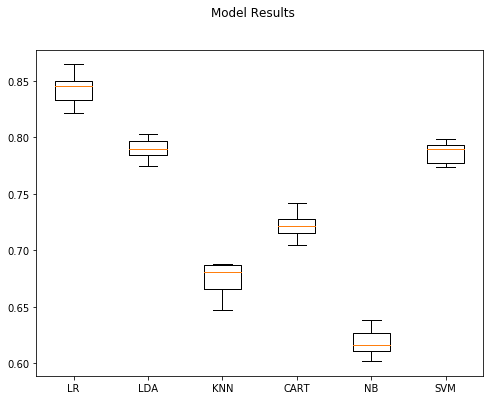

In [76]:
figure = plt.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
plt.boxplot(results.values())
axis.set_xticklabels(results.keys())
plt.show()

Once the results of these models are compared to the training results in the [first write-up](./Model-06.ipynb) of this series we can see we lost performance for every model.  We did gain; however, a boost in speed at least for the LR model.  It completed in a matter of minutes.  The SVM model did not fair so well; it took almost 5 hours for it to complete.

Overall I'd say this idea--at least for this set of models--is a bust, and we'll retain our earlier work as the baseline for comparison.  

Here are the original results for reference:

<img style="float: left; margin-right: 15px; width: 65%; height: 65%;" src="images/model-06-first-run-results.png" />

### LR Tuning

In [ ]:
modelName = "LR"
modelObj =  LogisticRegression()
params = {
    'LR__penalty' : [ 'l1', 'l2' ],
    'LR__C' : makeRange(1, 21, 1, 0.1, 1),
}

tuneModel(modelName, modelObj, params)

### LR Tuning Comments

The cell above took a little over 15 hours to complete, and we gained around 1% in accuracy.  Was it worth it?  Probably not, because I'm assuming models we'll develop and assess later on will have better performance.

What we did gain; however, is a solid example of why a quick and dirty model is a valuable thing to create early on in the process.  It gives you a baseline you can measure further efforts and gains against.  So in this case we know that the baseline model which took a fraction of the time is almost just as good as a time consuming model we had to run overnight.  Clearly there isn't a good ratio of efforts-to-results here, and so we either need to 1) settle on the baseline LR model to meet our needs, or 2) explore some other avenues.

If we choose option two then we can continue to compare against the baseline model to guide our efforts and hopefully avoid wasting lots of time with suboptimal solutions.

## Initial pass - Ensemble methods

Next up we'll see how a selection of ensemble methods perform on the 'de-noised' data.

*Note:  The code block below took around 1.5 hours to complete, so you may want to run this over lunch.*

In [77]:
# Init vars and params
eModels = []
eResults = {}
eFolds = 10
eSeed = 10

# Use accuracy since this is a classification problem
eScore = 'accuracy'

# Create a Pandas DF to hold all our spiffy results
eDF = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Create the scaled model objects
eModels.append(('AB', AdaBoostClassifier()))
eModels.append(('GBM', GradientBoostingClassifier()))
eModels.append(('RF', RandomForestClassifier()))
eModels.append(('ET', ExtraTreesClassifier()))

# Run the models
for modelName, model in eModels:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = eFolds, random_state = eSeed)
    eResults[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = eScore)
    eDF.loc[len(eDF)] = list([modelName, eResults[modelName].mean(), eResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
display(eDF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

Training AB ....
Training GBM ....
Training RF ....
Training ET ....


,Model,Accuracy,StdDev
3,ET,0.79860,0.009452
1,GBM,0.79690,0.010986
0,AB,0.79685,0.008989
2,RF,0.79155,0.009819


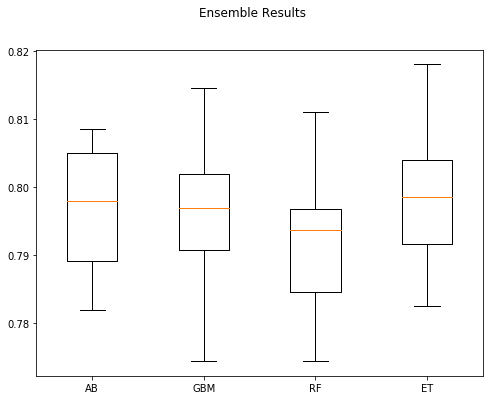

In [78]:
figure = plt.figure(figsize = (8,6))
figure.suptitle("Ensemble Results")
axis = figure.add_subplot(111)
plt.boxplot(eResults.values())
axis.set_xticklabels(eResults.keys())
plt.show()

Again the accuracy is less than what we had previously.

## Kaggle model

And finally for completeness we'll also examine the Kaggle model again:

In [79]:
_DF = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])
_Results = {}
_model = RandomForestClassifier(n_estimators = 100)

kFold = KFold(n_splits = eFolds, random_state = eSeed)
_Results[modelName] = cross_val_score(_model, xTrain, yTrain, cv = kFold, scoring = eScore)

_DF.loc[len(_DF)] = list(['RandomForestClassifier', _Results[modelName].mean(), _Results[modelName].std()])
display(_DF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

,Model,Accuracy,StdDev
0,RandomForestClassifier,0.8301,0.010476


And the same story here too:  Less accuracy than what we had before.

# Summary

In [1]:
%%html
<style>
table {float:left}
</style>

While removing 'noisy' terms not directly related to sentiment was an interesting idea to explore, it did not result in improvements to model performance.  In fact it did the opposite, and so this line of exploration will be rejected in favor of keeping the current base line model and accuracy rating as benchmarks moving forward.

In this write-up we accomplished the following:

1. Created a sparser feature set by removing words not directly related to sentiment
2. Ran the models from the [last write-up](./Model-06.ipynb) against the new, sparser feature set
3. Determined that the new feature set did not improve our ability to correctly classify movie review sentiment

For reference here is the baseline model:

|Model|Accuracy|Best Params                        |
|-----|--------|-----------------------------------|
|LR   |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|